<a href="https://colab.research.google.com/github/pnp642001/AI_PROJECT/blob/main/Final_GRP_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Text Classification (Group Assignment 1)

## Team Members:
1. Fatima
2. Lin-chi
3. Parth

Description:


Take six different samples of Gutenberg digital books (or your choice of text corpus), which are of six different authors, that you suspect are of the same genres and are semantically the same. For example, choose two of the books 1- The Brothers Karamazov and 2- Thus Spoke Zarathustra 3- Nausea.

Separate and set aside unbiased random partitions for training, validation and testing.

The overall objective is to produce classification predictions and compare them; analyze the pros and cons of algorithms and generate and communicate the insights.

 Gauge the bias and variability of the models to decide the champion model. Then play with the features and other factors that provide you with leverages to make it harder for the model to predict and bring the accuracy down for about 20% and then check the bias and variability using the overlay of different genre (drama, nonfiction, fiction (mystery, romance) ), author's world-view, gender, nationality, place of birth, education, or marital status etc.

Prepare the data: create random samples of 200 documents of each book, representative of the source input. Prepare the records of 100 words records for each document, label them as a, b and c etc. as per the book they belong to.

Preprocess the data: remove stop-words and garbage characters if needed.

Transform to BOW, and TF-IDF, n-gram, (LDA, word-embedding, optional) etc.

Train a machine that can tell which author (and genre), when asked!

Evaluation: Do ten-fold cross-validation.

Perform Error-Analysis: Identity what were the characteristics of the instance records that threw the machine off. Evaluate for the potential bias, author's or book's characteristics. Explore finding semantic explanations for the confusions.

Document your steps, explain the results effectively, using graphs.

Verify and validate your programs; Make sure your programs run without syntax or logical errors.

Massage the data: Reduce the number of words per document if the accuracy is too high and then repeat the above steps.





# **IMPORTING THE NECESSARY LIBRARIES**

### Commented by: **PARTH PATEL**
**Here's a short explanation of each library used in the code:**

mlxtend: This library, installed using %pip install mlxtend --upgrade, provides various utilities and extensions to complement scikit-learn's functionality. It includes tools for feature selection, model stacking, and more.

math: The math library in Python provides mathematical functions like square root, logarithm, and others. It is a standard library for basic mathematical operations.

nltk (Natural Language Toolkit): nltk is a powerful library for working with human language data. It includes tools for tokenization, stemming, lemmatization, and various corpora for natural language processing tasks.

pandas: pandas is a popular data manipulation library in Python. It provides data structures like DataFrame for efficient data handling and analysis.

numpy: numpy is a numerical computing library that provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on them.

re (Regular Expression): The re module in Python provides regular expression matching operations. It is useful for string manipulation and searching based on patterns.

matplotlib.pyplot: matplotlib is a 2D plotting library for creating static, animated, and interactive visualizations in Python. The pyplot module provides a convenient interface for plotting.

stopwords (nltk.corpus.stopwords): This module from nltk provides a list of common stop words (e.g., "the", "and") that are often removed during text preprocessing in natural language processing tasks.

WordNetLemmatizer (nltk.stem.WordNetLemmatizer): nltk's WordNet Lemmatizer is used for reducing words to their base or root form. It is commonly employed in text preprocessing.

train_test_split (sklearn.model_selection.train_test_split): This function from scikit-learn is used to split data into training and testing sets for machine learning model evaluation.

tensorflow: TensorFlow is an open-source machine learning library developed by Google. It is commonly used for building and training deep learning models.

Tokenizer (tensorflow.keras.preprocessing.text.Tokenizer): Tokenizer is a utility in TensorFlow for converting text data into sequences of integers, which is often required for input to neural networks.

pad_sequences (tensorflow.keras.preprocessing.sequence.pad_sequences): This function in TensorFlow is used to ensure that all sequences in a dataset have the same length by padding or truncating them as needed.

classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix (sklearn.metrics): These functions from scikit-learn are used for evaluating the performance of classification models, providing metrics like precision, recall, F1-score, confusion matrix, and accuracy.

CountVectorizer, TfidfVectorizer (sklearn.feature_extraction.text): These classes in scikit-learn are used for converting text data into numerical features suitable for machine learning models, specifically for bag-of-words representation.

DecisionTreeClassifier, KNeighborsClassifier, svm (sklearn.tree, sklearn.neighbors, sklearn.svm): These are various classifiers implemented in scikit-learn, including Decision Tree, K-Nearest Neighbors, and Support Vector Machine (SVM).

KFold, cross_val_score, learning_curve, ShuffleSplit (sklearn.model_selection): These functions/classes from scikit-learn are used for performing k-fold cross-validation, obtaining cross-validation scores, plotting learning curves, and creating shuffled splits for cross-validation.

bias_variance_decomp (mlxtend.evaluate): This function from mlxtend is used for decomposing the bias-variance tradeoff in a machine learning model.

preprocessing (sklearn): The preprocessing module in scikit-learn provides various utilities for preprocessing data, including scaling, encoding categorical features, and imputing missing values.

In [5]:

!pip install mlxtend --upgrade
!pip install scikit-plot

import math
import nltk
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from nltk.corpus import gutenberg
from sklearn.utils import shuffle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from mlxtend.evaluate import bias_variance_decomp
from sklearn import preprocessing
from scikitplot.metrics import confusion_matrix

In [6]:
#importing the nltk library and downloading the necessary text
import nltk
nltk.download("stopwords") #downloads list of common stop words
nltk.download("wordnet") # WordNet is a lexical database of the English language that relates words to one another in terms of synonyms,
# hypernyms, hyponyms, etc. It is often used for tasks like lemmatization (reducing words to their base or root form).
nltk.download('punkt')
#The Punkt tokenizer is used for sentence tokenization, which involves breaking text into sentences.
# It's essential for various natural language processing tasks.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
#printing the list of stop words
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# **DATA PREPARATION**

In [9]:
#we will use request function of urllib library for downloading the books
from urllib import request

#Birds of the Indian Hills
url1='https://www.gutenberg.org/cache/epub/23755/pg23755.txt'

#Birds in Town & Village
url2='https://www.gutenberg.org/cache/epub/7353/pg7353.txt'

#The Bird Book
url3='https://www.gutenberg.org/cache/epub/30000/pg30000.txt'

#Territory in Bird Life
url4='https://www.gutenberg.org/cache/epub/31987/pg31987.txt'

#The Nests and Eggs of Indian Birds, Volume 1
url5='https://www.gutenberg.org/cache/epub/13117/pg13117.txt'

#Little Brothers of the Air
url6='https://www.gutenberg.org/cache/epub/27277/pg27277.txt'


#preparing the data from the selected books
urls = [url1 ,url2 ,url3, url4 ,url5,url6]
Books_names = ["Birds of the Indian Hills" ," Birds in Town & Village" , "The Bird Book"  , "Territory in Bird Life" ,"The Nests and Eggs of Indian Birds, Volume 1","Little Brothers of the Air"]
Books_label = [ 'a' ,'b' ,'c','d' ,'e','f']
Authors = ["Douglas Dewar" ,"W. H. Hudson" ,"Chester A. Reed" , "Henry Eliot Howard" ,"Allan Octavian Hume","Olive Thorne Miller"]
Books_contents = []

# This code fetches content from multiple URLs, extracts words, lemmatizes them, removes common English stopwords,
# and stores the processed words for each URL in a list.
for U  in urls :
  response = request.urlopen(U)
  raw = response.read().decode('utf8' )
  text= re.findall(r"[a-zA-Z]{3,}", raw)
  lemmatizer = WordNetLemmatizer()
  lst =[]
  for i in text:
    W = i.lower() #converting all the text to lowercase
    w = lemmatizer.lemmatize(W) #reducing all the words to base form
    if w not in set(stopwords.words('english')):
      lst.append(str(w))
  Books_contents.append(lst)

# making sure that all lists contain 100 word
Books_contents_100 = []
for i in Books_contents:
  l = i[0:(math.floor(len(i)/100)) * 100]
  Books_contents_100.append(l)

In [10]:
# combining all lists in one dataframe
data = pd.DataFrame()

for i in range(len(Books_contents_100)):
    dic = {}

    lis =  [Books_contents_100[i][x:x+100] for x in range(0, len(Books_contents_100[i]), 100)]

    dic['index']= i  # refer to the number of the book
    dic['Authors']= Authors[i]
    dic['title']= Books_names[i] # refer to the book name
    dic['label'] = Books_label[i]
    dic['100_Words'] = lis # the partition of 100 words
    df_0 = pd.DataFrame(dic)
    for i in range(len(df_0)):
      df_0["100_Words"][i] = " ".join(df_0["100_Words"][i])
    df = df_0[:200]
    data = data.append(df)

data = shuffle(data)

data.head(10)

<ipython-input-10-eb5288227c7a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0["100_Words"][i] = " ".join(df_0["100_Words"][i])
<ipython-input-10-eb5288227c7a>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df)
<ipython-input-10-eb5288227c7a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0["100_Words"][i] = " ".join(df_0["100_Words"][i])
<ipython-input-10-eb5288227c7a>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

,index,Authors,title,label,100_Words
84,2,Chester A. Reed,The Bird Book,c,ocean wa laid hollow among loose stone ledge o...
126,5,Olive Thorne Miller,Little Brothers of the Air,f,twig looked interest trying see veery found te...
54,3,Henry Eliot Howard,Territory in Bird Life,d,alone upon perfect development feather exceed ...
32,5,Olive Thorne Miller,Little Brothers of the Air,f,partaking luncheon every minute nestful restle...
107,0,Douglas Dewar,Birds of the Indian Hills,a,bird size wren head grey remainder upper pluma...
87,2,Chester A. Reed,The Bird Book,c,egg differ common fulmar egg laid rocky cliff ...
95,1,W. H. Hudson,Birds in Town & Village,b,blackbird like thrush sometimes borrows note p...
113,3,Henry Eliot Howard,Territory in Bird Life,d,definitely paired common occurrence scarcely n...
72,5,Olive Thorne Miller,Little Brothers of the Air,f,mate flew whether praise punish could guessed ...
179,4,Allan Octavian Hume,"The Nests and Eggs of Indian Birds, Volume 1",e,pale greenish blue bluish green marking spot s...



 The most frequent 50 words of book c



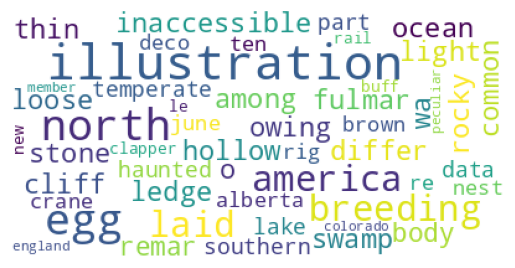


 The most frequent 50 words of book f



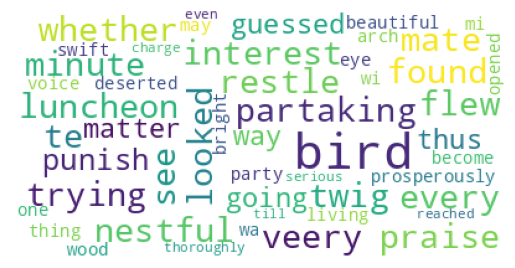


 The most frequent 50 words of book d



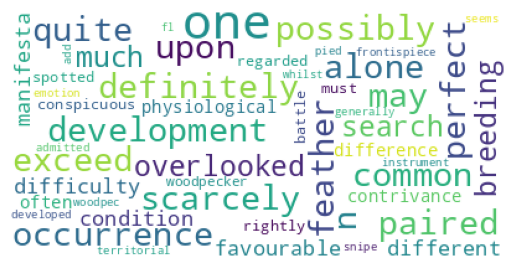


 The most frequent 50 words of book a



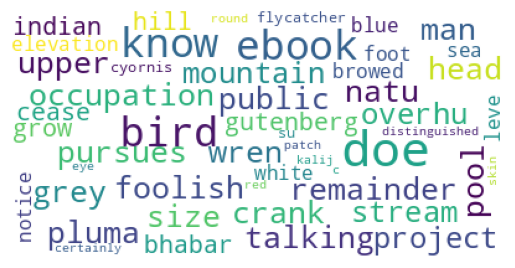


 The most frequent 50 words of book b



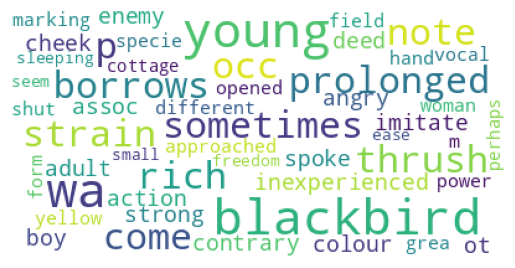


 The most frequent 50 words of book e



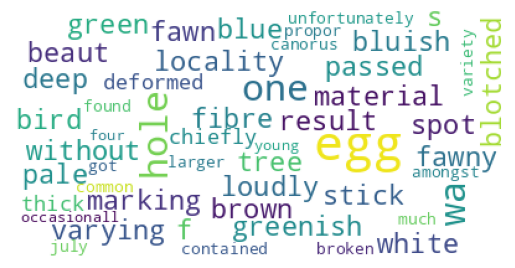

In [11]:
# plotting word cloud for the most frequent 50 words in each book
import wordcloud

for label in data['label'].unique():
  books = data[data["label"]==label]["100_Words"]

  #wordcloud
  print(f"\n The most frequent 50 words of book {label}\n")
  wc = wordcloud.WordCloud(background_color='white', max_words=50,
                          max_font_size=40)
  wc = wc.generate(str(books))
  plt.axis('off')
  plt.imshow(wc, cmap=None)
  plt.show()

In [12]:
#preparing the data
X_data = data['100_Words']
Y_data = data['label']

print(X_data.shape)
print(Y_data.shape)

# Split data to train and test data set
#X_data: This represents the features or independent variables of your dataset
#Y_data: This represents the target variable or dependent variable in your dataset.
#test_size=0.3: This parameter specifies the proportion of the dataset that should be included in the test split.
#In this case, 30% of the data will be used for testing, and the remaining 70% will be used for training.

X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_data, Y_data, test_size= 0.3,random_state=90)
#print(data['100_Words'])
print(data['label'])

(1200,)
(1200,)
84     c
126    f
54     d
32     f
107    a
      ..
135    c
108    d
158    c
61     b
189    f
Name: label, Length: 1200, dtype: object


In [13]:
# ensure that the data consists of 5 different books with 200 document for each
lengths = [len(data[data['label'] == x ]) for x in Books_label ]
lengths

[200, 200, 200, 200, 200, 200]

# **BUILDING THE FOUNDATION FOR MODEL TRAINING AND TESTING**

In [14]:
#this function will help us to determine how our model is learning
def plot_curve_analyzer(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0,5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, '-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, '-', color="g",
             label="Cross-validation score")

    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');
    return plt

In [15]:
#this function helps you to build the model in a single go
def model_builder(model, model_name, X_train, X_test, y_train, y_test, cv ):

  global general_model
  general_model = model.fit(X_train, y_train) # train the model
  # make prediction of X_test and print Classification report
  global y_pred
  y_pred = model.predict(X_test)
  #Applying K_Fold Cross Vaildation

  cv_accuracies = cross_val_score(estimator = model , X= X_train , y = y_train ,cv = cv)
  accuracy_avg = cv_accuracies.mean()# measure the accuracy of the model (bais)
  test_accuracy = accuracy_score(y_test, y_pred)
  # Evaluate the model performance using metrics.accuracy_score to measure the score
  print("cross_validation accuracy :  ", cv_accuracies)
  print("\n average cross validation accuracy :  " , accuracy_avg)
  print("\n testing accuracy :  "  ,test_accuracy,"\n")
  print("*************************************************************************************************")
  print(classification_report(y_test, y_pred))
  # print Confusion Matrix
  #print('\nConfusion Matrix:\n')
  #print(plot_confusion_matrix(y_test, y_pred))
  #print("*************************************************************************************************")

  # print Confusion Matrix
  print('\nConfusion Matrix:\n')
  print(confusion_matrix(y_test, y_pred))
  print("----------------------------------------------------------------------------------------------")
  #plot_confusion_matrix(general_model, X_test, y_test, figsize=(5, 5), xticklabels='vertical')

  plot_curve_analyzer(general_model,"Learning Curve of "+ model_name,X_train, y_train, ylim=(0, 1.1), cv=cv, n_jobs=8)

  print("----------------------------------------------------------------------------------------------")



In [16]:
#this function will help us to determine which prediction of the data went wrong
def find_out_wrong_one(X_train, y_train, X_test, y_test ,y_pred):
  errors  = []
  correct = []
  predict = []
  gg=np.array(y_test)

  for index ,text in enumerate(X_test_df) :
    if y_pred[index] != gg[index]:
      error = text
      errors.append(error)
      corr = gg[index]
      correct.append(corr)
      pred = y_pred[index]
      predict.append(pred)
  document_df = pd.DataFrame()
  document_df['doc_error'] = errors
  document_df['correct']   = correct
  document_df['Predicted'] = predict
  #document_df['book_name'] =
  print(" The Documents that the Model Misclassify are  : " , len(errors))
  print("*************************************************************************************************")

  #label_encoder object knows how to understand word labels.
  label_encoder = preprocessing.LabelEncoder()
  X_train_copy = np.copy(X_train)
  X_test_copy = np.copy(X_test)
  y_train_copy = np.copy(y_train)
  y_test_copy = np.copy(y_test)

  avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
         general_model, np.array(X_train_copy)  , label_encoder.fit_transform(y_train_copy)  , np.array(X_test_copy)  , label_encoder.fit_transform(y_test_copy),num_rounds=2, random_seed=123)

  print('Average bias: %.5f' % avg_bias)
  print('Average variance: %.5f' % avg_var)
  print("*************************************************************************************************")

  return document_df

# **BAG-OF-WORDS (BOW)**

In [17]:
count_Vec= CountVectorizer()
bow = count_Vec.fit_transform(data['100_Words'])
bow_df = pd.DataFrame(bow.toarray(), columns=count_Vec.get_feature_names_out())
bow_df

,abandon,abandoned,abandonment,abbey,abbotti,abdomen,abdominal,aberrant,aberration,abhorred,...,zigzag,zinc,zingiberaceae,zizyphus,zojee,zone,zoological,zoologist,zoology,zosterops
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **SPLITTING THE DATASET FOR TRAINING AND TESTING**

In [18]:
X = bow.toarray()
Y = data['label']

print(X.shape)
print(Y.shape)

# Split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.4, random_state= 48)

(1200, 11925)
(1200,)


# **SVM - BOW**

cross_validation accuracy :   [0.95833333 0.98611111 0.94444444 0.95833333 0.97222222 0.95833333
 0.97222222 0.97222222 0.95833333 0.95833333]

 average cross validation accuracy :   0.9638888888888889

 testing accuracy :   0.9583333333333334 

*************************************************************************************************
              precision    recall  f1-score   support

           a       1.00      0.87      0.93        87
           b       0.90      0.96      0.93        79
           c       0.99      1.00      0.99        76
           d       1.00      0.96      0.98        80
           e       0.91      0.97      0.94        71
           f       0.96      0.99      0.97        87

    accuracy                           0.96       480
   macro avg       0.96      0.96      0.96       480
weighted avg       0.96      0.96      0.96       480


Confusion Matrix:

[[76  4  0  0  6  1]
 [ 0 76  0  0  1  2]
 [ 0  0 76  0  0  0]
 [ 0  3  0 77  0  0]
 [ 0  0  

,doc_error,correct,Predicted
0,often considerable consequently possible keep ...,a,b
1,passed daisy field white fence fence beauty de...,d,b
2,fratercula arctica naumanni northerly subspeci...,e,f
3,sing alike one posse charm truth alike affect ...,d,b
4,harm taking attitude men science explain actin...,a,b


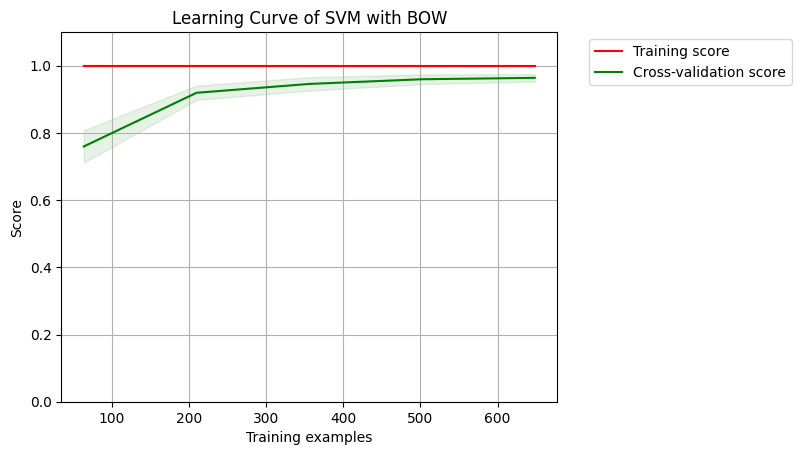

In [19]:
svm_bow = svm.SVC(kernel='linear')
svm_bow.fit(X_train, y_train)
model_builder(svm_bow,"SVM with BOW", X_train, X_test, y_train, y_test ,10)
SVM_Bow_error_df = find_out_wrong_one(X_train, y_train, X_test, y_test ,y_pred)
display(SVM_Bow_error_df.head())

# **DECISION TREE - BOW**

cross_validation accuracy :   [0.69444444 0.79166667 0.75       0.625      0.75       0.80555556
 0.77777778 0.77777778 0.79166667 0.72222222]

 average cross validation accuracy :   0.7486111111111111

 testing accuracy :   0.7583333333333333 

*************************************************************************************************
              precision    recall  f1-score   support

           a       0.86      0.57      0.69        87
           b       0.50      0.72      0.59        79
           c       0.94      0.95      0.94        76
           d       0.93      0.79      0.85        80
           e       0.80      0.79      0.79        71
           f       0.72      0.76      0.74        87

    accuracy                           0.76       480
   macro avg       0.79      0.76      0.77       480
weighted avg       0.79      0.76      0.76       480


Confusion Matrix:

[[50 24  1  0  5  7]
 [ 3 57  0  3  4 12]
 [ 0  0 72  0  4  0]
 [ 0 14  0 63  1  2]
 [ 3  4  

,doc_error,correct,Predicted
0,sath bhai northern india bold almost confiding...,e,f
1,southern british province southward winter alo...,a,b
2,like english daisy size flower edge every tiny...,b,f
3,often considerable consequently possible keep ...,a,b
4,bird thon thereus range tropical sea chiefly p...,b,a


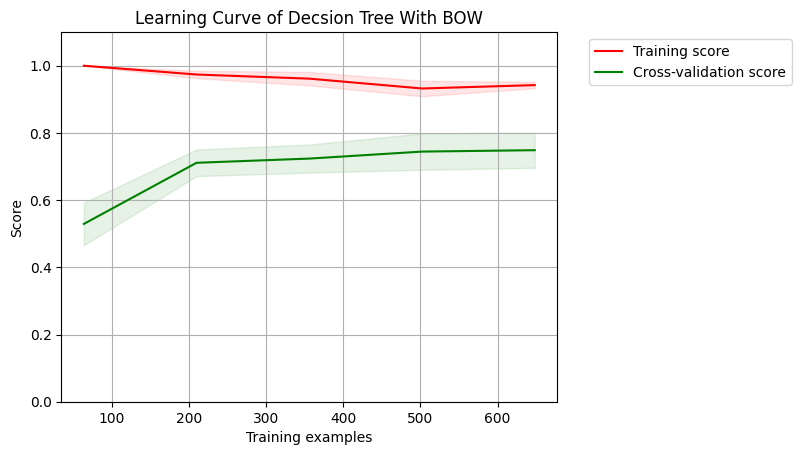

In [20]:
decision_tree_BOW = DecisionTreeClassifier(random_state=0, max_depth= 10, criterion= 'entropy', min_samples_leaf= 1)

model_builder(decision_tree_BOW,"Decsion Tree With BOW", X_train, X_test, y_train, y_test ,10)

DT_Bow_error_df = find_out_wrong_one(X_train, y_train, X_test, y_test ,y_pred)
display(DT_Bow_error_df.head())

# **KNN-BOW**

cross_validation accuracy :   [0.93055556 0.93055556 0.91666667 0.90277778 0.91666667 0.94444444
 0.95833333 0.95833333 0.94444444 0.88888889]

 average cross validation accuracy :   0.9291666666666666

 testing accuracy :   0.9333333333333333 

*************************************************************************************************
              precision    recall  f1-score   support

           a       0.94      0.86      0.90        87
           b       0.96      0.81      0.88        79
           c       0.99      1.00      0.99        76
           d       0.99      0.97      0.98        80
           e       0.85      0.97      0.91        71
           f       0.90      0.99      0.94        87

    accuracy                           0.93       480
   macro avg       0.94      0.93      0.93       480
weighted avg       0.94      0.93      0.93       480


Confusion Matrix:

[[75  1  0  0  9  2]
 [ 3 64  0  1  3  8]
 [ 0  0 76  0  0  0]
 [ 1  1  0 78  0  0]
 [ 1  1  

,doc_error,correct,Predicted
0,away went happy discovered nest planning come ...,b,e
1,collaret interrupted middle hill bulbul vivaci...,b,f
2,margin page pacific kittiwake rissa tridactyla...,a,e
3,specie without indirectly benefiting specie at...,d,b
4,mile breadth known bhabar strip forest compose...,a,e


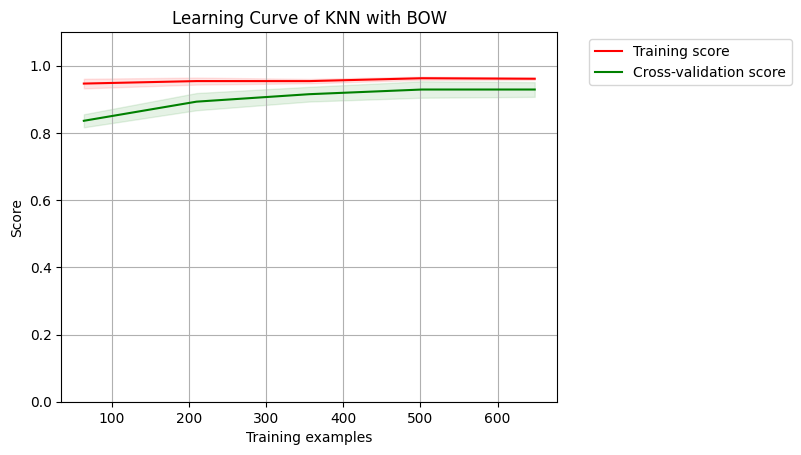

In [21]:
knn_bow = KNeighborsClassifier(n_neighbors = 3, algorithm= 'kd_tree', p= 1)
model_builder(knn_bow,"KNN with BOW", X_train, X_test, y_train, y_test ,10)

KNN_Bow_error_df = find_out_wrong_one(X_train, y_train, X_test, y_test ,y_pred)
display(KNN_Bow_error_df.head())

# **TF-IDF**

In [22]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(data['100_Words'])
tfidf_df = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df

,abandon,abandoned,abandonment,abbey,abbotti,abdomen,abdominal,aberrant,aberration,abhorred,...,zigzag,zinc,zingiberaceae,zizyphus,zojee,zone,zoological,zoologist,zoology,zosterops
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.088547,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1196,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1197,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1198,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **SPLITTING THE DATASET TO TRAIN AND TEST WITH TF-IDF**

In [23]:
XX= tfidf.toarray()
yy = data['label']

print(XX.shape)
print(yy.shape)

# Split data to train and test
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size= 0.3, random_state= 42)

(1200, 11925)
(1200,)


# **DECISION TREE WITH TF-IDF**

cross_validation accuracy :   [0.73809524 0.73809524 0.75       0.72619048 0.73809524 0.80952381
 0.83333333 0.76190476 0.76190476 0.77380952]

 average cross validation accuracy :   0.7630952380952382

 testing accuracy :   0.7027777777777777 

*************************************************************************************************
              precision    recall  f1-score   support

           a       0.51      0.79      0.62        53
           b       0.62      0.58      0.60        65
           c       0.88      0.85      0.86        59
           d       0.87      0.73      0.79        63
           e       0.75      0.67      0.70        66
           f       0.70      0.61      0.65        54

    accuracy                           0.70       360
   macro avg       0.72      0.71      0.71       360
weighted avg       0.72      0.70      0.71       360


Confusion Matrix:

[[42  1  1  1  5  3]
 [12 38  0  5  3  7]
 [ 5  0 50  0  4  0]
 [ 6  6  3 46  1  1]
 [12  4  

,doc_error,correct,Predicted
0,bird capable combining note posse surprising n...,b,a
1,warbler chiffchaff district mind two specie ar...,f,a
2,special meeting place perform antic engage ser...,f,b
3,silent varying day week male grasshopper warbl...,e,b
4,egg herring gull except series egg vega averag...,a,d


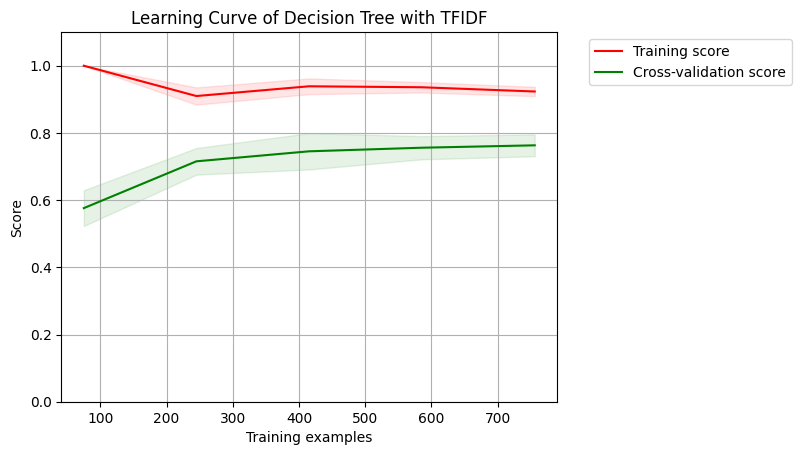

In [24]:

Decision_tree_tfidf = DecisionTreeClassifier(random_state=0, max_depth= 10)
model_builder(Decision_tree_tfidf, "Decision Tree with TFIDF", XX_train, XX_test, yy_train, yy_test ,10)


DT_tfidf_error_df = find_out_wrong_one(XX_train, yy_train, XX_test, yy_test ,y_pred)
display(DT_tfidf_error_df.head())

# **KNN WITH TF-IDF**

cross_validation accuracy :   [0.94047619 0.97619048 0.91666667 0.92857143 0.98809524 0.92857143
 0.96428571 0.98809524 0.91666667 0.94047619]

 average cross validation accuracy :   0.9488095238095238

 testing accuracy :   0.9583333333333334 

*************************************************************************************************
              precision    recall  f1-score   support

           a       0.93      0.94      0.93        53
           b       0.97      0.91      0.94        65
           c       0.98      1.00      0.99        59
           d       0.98      0.97      0.98        63
           e       0.94      0.97      0.96        66
           f       0.95      0.96      0.95        54

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360


Confusion Matrix:

[[50  0  0  0  3  0]
 [ 2 59  0  0  1  3]
 [ 0  0 59  0  0  0]
 [ 1  0  1 61  0  0]
 [ 1  1  

,doc_error,correct,Predicted
0,silent varying day week male grasshopper warbl...,e,b
1,lay four egg bluish green dusky blotch spot no...,b,f
2,patience student silent wary wisely chosen san...,b,a
3,around branch darting behind leaf twig tail sp...,a,e
4,specie without indirectly benefiting specie at...,b,a


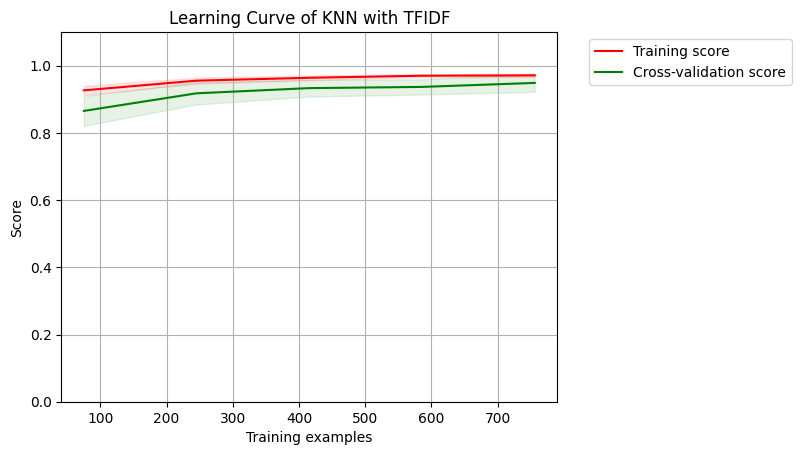

In [25]:
knn_tfidf =  KNeighborsClassifier(n_neighbors = 5, algorithm= 'kd_tree', p=2)

model_builder(knn_tfidf, "KNN with TFIDF", XX_train, XX_test, yy_train, yy_test ,10)
knn_tfidf_error_df = find_out_wrong_one(XX_train, yy_train, XX_test, yy_test ,y_pred)
display(knn_tfidf_error_df.head())

# **SVM WITH TF-IDF**

cross_validation accuracy :   [0.97619048 1.         0.94047619 0.94047619 0.98809524 0.95238095
 0.97619048 1.         0.98809524 0.94047619]

 average cross validation accuracy :   0.9702380952380952

 testing accuracy :   0.9722222222222222 

*************************************************************************************************
              precision    recall  f1-score   support

           a       0.98      0.87      0.92        53
           b       0.94      1.00      0.97        65
           c       1.00      1.00      1.00        59
           d       1.00      0.98      0.99        63
           e       0.94      0.97      0.96        66
           f       0.98      1.00      0.99        54

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360


Confusion Matrix:

[[46  2  0  0  4  1]
 [ 0 65  0  0  0  0]
 [ 0  0 59  0  0  0]
 [ 1  0  0 62  0  0]
 [ 0  2  

,doc_error,correct,Predicted
0,silent varying day week male grasshopper warbl...,e,b
1,day wa change master robert behavior afternoon...,a,b
2,around branch darting behind leaf twig tail sp...,a,e
3,lower part reddish yellow myiophoneus temminck...,a,f
4,gull illustration left hand margin page point ...,a,b


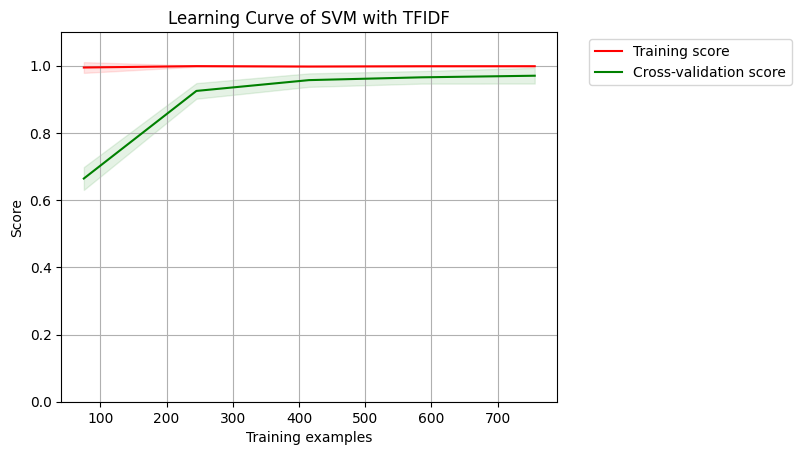

In [26]:
# Build SVM model
svm_tfidf = svm.SVC(kernel='sigmoid')

model_builder(svm_tfidf, "SVM with TFIDF", XX_train, XX_test, yy_train, yy_test ,10)
SVM_tfidf_error_df  = find_out_wrong_one(XX_train, yy_train, XX_test, yy_test ,y_pred)
display(SVM_tfidf_error_df.head())

In [27]:
SVM_tfidf_error_df

,doc_error,correct,Predicted
0,silent varying day week male grasshopper warbl...,e,b
1,day wa change master robert behavior afternoon...,a,b
2,around branch darting behind leaf twig tail sp...,a,e
3,lower part reddish yellow myiophoneus temminck...,a,f
4,gull illustration left hand margin page point ...,a,b
5,plumage olive green yellow streak cheek dark b...,d,a
6,crow unusually long tail king crow black pluma...,a,e
7,knew occupant ground fighting wa taking place ...,a,e
8,standing forth azure sky tear eye away white p...,a,e
9,illustration varies white greenish blue illust...,e,b


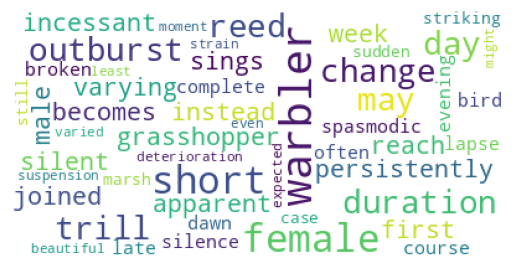

'silent varying day week male grasshopper warbler first reach sings persistently joined female change becomes apparent instead incessant trill spasmodic outburst short duration course day bird lapse silence may broken short dawn late evening often complete striking still change case marsh warbler sudden deterioration even suspension strain beautiful varied moment might least expected arrest attention reed warbler headquarters willow sang vigorously middle may female arrived june voice wa hushed except occasional outburst lacked force short duration wood warbler secures territory repeat sibilant trill unwearying zeal yet sooner doe mate appear emotion manifested direction reed bunting vociferous february march female arrives'

In [28]:
wc = wordcloud.WordCloud(background_color='white', max_words=50,
                          max_font_size=35)
wc = wc.generate(SVM_tfidf_error_df['doc_error'][0])
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()
SVM_tfidf_error_df['doc_error'][0]

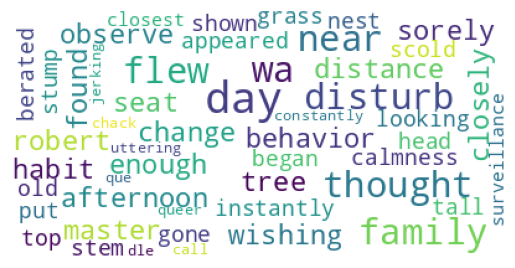

'day wa change master robert behavior afternoon day wishing observe habit closely found seat tree distance near enough thought disturb disturb sorely however instantly appeared calmness shown day looking nest wa gone began scold head family berated top grass stem flew tall old stump put closest surveillance constantly uttering queer call like chack que dle jerking wing tail every way showing considered intrusive altogether much interested family affair admitted charge could deny retire last apparently determined insist upon going started high perch directly toward swiftly force flew twenty foot swooped thought would certainly strike face instinctively dodged passed near wind'

In [29]:
  wc = wordcloud.WordCloud(background_color='white', max_words=50,
                          max_font_size=35)
wc = wc.generate(SVM_tfidf_error_df['doc_error'][1])
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()
SVM_tfidf_error_df['doc_error'][1]

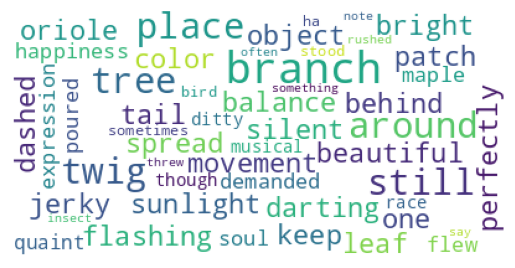

'around branch darting behind leaf twig tail spread keep balance jerky movement bright oriole color flashing dashed patch sunlight beautiful object perfectly silent one happiness demanded expression flew maple tree poured soul quaint though musical ditty race sometimes stood still branch like bird ha something say often rushed around insect tree threw note firm snap beak promptly every half hour little sprite took way precious apple branch dropped light snow flake certain twig nearest side homestead flash nest announced departure madame popped place settle business far wonder even female redstart sit still taking place first examined treasure held leaning edge'

In [30]:
wc = wordcloud.WordCloud(background_color='white', max_words=50,
                          max_font_size=35)
wc = wc.generate(SVM_tfidf_error_df['doc_error'][2])
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()
SVM_tfidf_error_df['doc_error'][2]

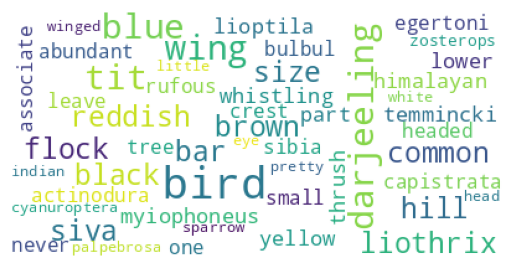

'lower part reddish yellow myiophoneus temmincki himalayan whistling thrush common darjeeling lioptila capistrata black headed sibia one abundant bird darjeeling actinodura egertoni rufous bar wing bird size bulbul associate small flock never leave tree common darjeeling reddish brown bird crest black bar wing zosterops palpebrosa indian white eye siva cyanuroptera blue winged siva hill tit pretty little bird size sparrow head blue deeper side crown streaked brown visible portion closed wing tail cobalt blue specie go flock ha habit tit utters cheerful chirrup liothrix lutea red billed liothrix hill tit pekin robin interesting bird form subject separate essay ixulus flavicollis'

In [31]:
wc = wordcloud.WordCloud(background_color='white', max_words=50,
                          max_font_size=35)
wc = wc.generate(SVM_tfidf_error_df['doc_error'][3])
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()
SVM_tfidf_error_df['doc_error'][3]


 The most frequent 50 words of book b



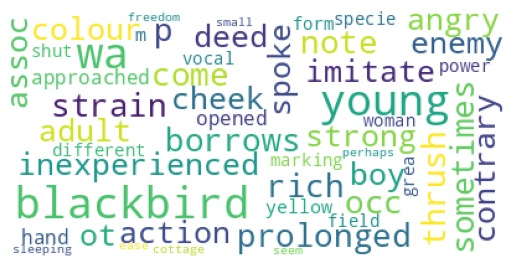


 The most frequent 50 words of book c



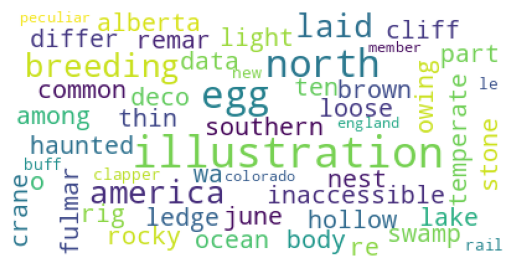


 The most frequent 50 words of book e



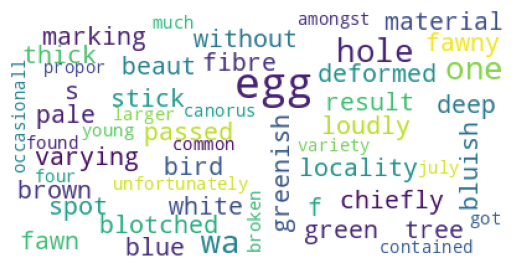

In [32]:
# plot word cloud for the most frequent 50 words in each book
import wordcloud

for label in ["b","c", 'e']:
  books = data[data["label"]==label]["100_Words"]

  #wordcloud
  print(f"\n The most frequent 50 words of book {label}\n")
  wc = wordcloud.WordCloud(background_color='white', max_words=50,
                          max_font_size=35)
  wc = wc.generate(str(books))
  plt.axis('off')
  plt.imshow(wc, cmap=None)
  plt.show()

# **N-GRAM**

In [33]:

# build bigram model
# 2-grams of words in addition to the 1-grams (individual words)
bigram_vectorizer = CountVectorizer(ngram_range=(1,2))

bigram = bigram_vectorizer.fit_transform(data['100_Words'])

bigram_df = pd.DataFrame(bigram.toarray(), columns= bigram_vectorizer.get_feature_names_out())

bigram_df

,abandon,abandon evil,abandoned,abandoned builder,abandoned daisy,abandoned homestead,abandoned impedimenta,abandoned nest,abandoned pursuit,abandoned search,...,zoologist,zoologist hand,zoologist never,zoology,zoology passion,zoology quite,zosterops,zosterops palbebrosa,zosterops palpebrosa,zosterops palpebrosus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **SPLITTING DATA FOR TRAINING AND TESTING**

In [34]:
XXX = bigram.toarray()
yyy = data['label']

print(XXX.shape)
print(yyy.shape)

# Split data to train and test
XXX_train, XXX_test, yyy_train, yyy_test = train_test_split(XXX, yyy, test_size= 0.4, random_state= 48)

(1200, 100363)
(1200,)


# **DECISION TREE WITH N-GRAM**

cross_validation accuracy :   [0.70833333 0.76388889 0.77777778 0.70833333 0.81944444 0.80555556
 0.72222222 0.72222222 0.80555556 0.70833333]

 average cross validation accuracy :   0.7541666666666667

 testing accuracy :   0.7625 

*************************************************************************************************
              precision    recall  f1-score   support

           a       0.80      0.66      0.72        87
           b       0.54      0.68      0.60        79
           c       0.91      0.92      0.92        76
           d       0.89      0.82      0.86        80
           e       0.78      0.79      0.78        71
           f       0.73      0.72      0.73        87

    accuracy                           0.76       480
   macro avg       0.78      0.77      0.77       480
weighted avg       0.77      0.76      0.77       480


Confusion Matrix:

[[57 13  1  1  8  7]
 [ 7 54  2  3  7  6]
 [ 1  2 70  0  1  2]
 [ 2 10  0 66  0  2]
 [ 1  4  4  0 56  6]


,doc_error,correct,Predicted
0,bird capable combining note posse surprising n...,f,d
1,sath bhai northern india bold almost confiding...,e,f
2,southern british province southward winter alo...,a,b
3,like english daisy size flower edge every tiny...,b,a
4,indian warbler winter visitor india eliminatin...,a,e


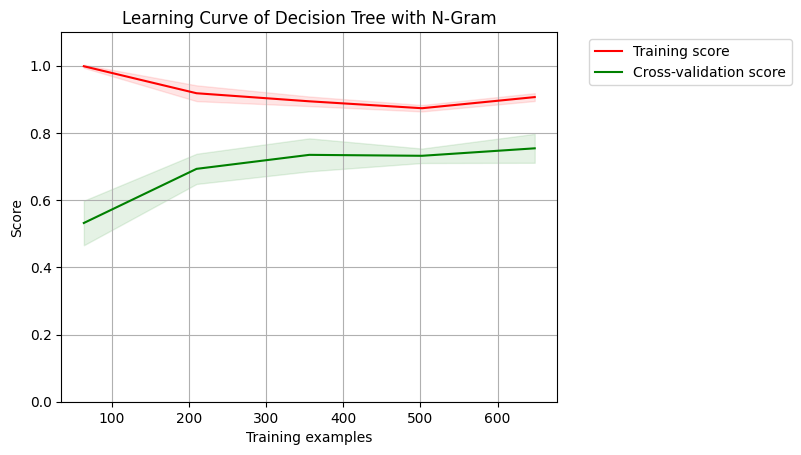

In [35]:
# Build DT model
Decision_tree_n_gram = DecisionTreeClassifier(random_state=0, max_depth= 10)
model_builder(Decision_tree_n_gram, "Decision Tree with N-Gram", XXX_train, XXX_test, yyy_train, yyy_test ,10)

dt_ngram_error_df = find_out_wrong_one(XXX_train, yyy_train, XXX_test, yyy_test ,y_pred)
display(dt_ngram_error_df.head())

# **KNN WITH N-GRAM**

In [ ]:
knn_n_gram =  KNeighborsClassifier(n_neighbors = 5, algorithm= 'kd_tree', p=2)

model_builder(knn_n_gram, "KNN with N-Gram", XXX_train, XXX_test, yyy_train, yyy_test ,10)

knn_ngram_error_df = find_out_wrong_one(XXX_train, yyy_train, XXX_test, yyy_test ,y_pred)
display(knn_ngram_error_df.head())

cross_validation accuracy :   [0.90277778 0.95833333 0.84722222 0.88888889 0.94444444 0.86111111
 0.94444444 0.88888889 0.93055556 0.90277778]

 average cross validation accuracy :   0.9069444444444444

 testing accuracy :   0.8979166666666667 

*************************************************************************************************
              precision    recall  f1-score   support

           a       0.97      0.79      0.87        87
           b       0.86      0.77      0.81        79
           c       0.99      0.99      0.99        76
           d       0.96      0.93      0.94        80
           e       0.89      0.93      0.91        71
           f       0.77      0.99      0.87        87

    accuracy                           0.90       480
   macro avg       0.91      0.90      0.90       480
weighted avg       0.91      0.90      0.90       480


Confusion Matrix:

[[69  6  1  0  6  5]
 [ 0 61  0  2  2 14]
 [ 1  0 75  0  0  0]
 [ 0  3  0 74  0  3]
 [ 1  1  

# **SVM WITH N-GRAM**

In [ ]:
# Build SVM model
svm_n_gram = svm.SVC(kernel='sigmoid')

model_builder(svm_n_gram, "SVM with N-gram", XXX_train, XXX_test, yyy_train, yyy_test ,10)

svm_ngram_error_df = find_out_wrong_one(XXX_train, yyy_train, XXX_test, yyy_test ,y_pred)
display(svm_ngram_error_df.head())